# Image registration

Image registration is the process of aligning two or more images of the same scene taken at different times, from different viewpoints, or by different sensors. The goal is to transform the images so that corresponding features (such as edges, textures, or key points) match spatially.

The key steps in image registration typically include:

1. **Feature Detection**: Identify distinct features (e.g., corners, edges, key points) in both images.
2. **Feature Matching**: Correspond matching features between the images (e.g., using descriptors like SIFT, SURF, or ORB).
3. **Transformation Estimation**: Calculate the transformation (e.g., affine, perspective, or non-rigid) that aligns one image to the other using the matched features.
4. **Image Transformation**: Apply the estimated transformation to one image to align it with the other.

Thanks to the vision pipeline module these lower level details are handled by the library leaving to the user only the end result.

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from visionpipelines.constants import RegistrationMethod
from visionpipelines.pipelines.registration_pipeline import RegistrationPipeline
from visionpipelines.tasks.registration_task import RegistrationTask

/home/simone/.pyenv/versions/vision/lib/python3.11/site-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


In [3]:
# Load the 2 test images
image_path1 = '../tests/data/IMG1_low_res.jpg'
image1 = cv2.imread(image_path1)
image_path2 = '../tests/data/IMG2_low_res.jpg'
image2 = cv2.imread(image_path2)

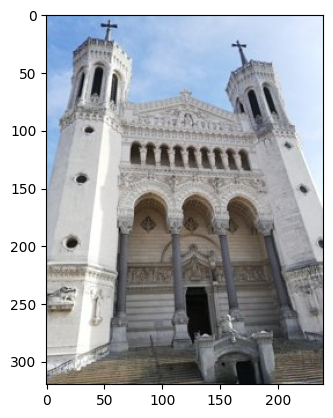

In [4]:
# plot the same image from 2 different viewing angles
imgplot1 = plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))

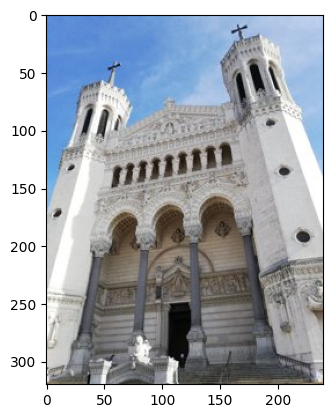

In [5]:
imgplot2 = plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

# ORB

In [6]:
# image registration with ORB method
pipeline = RegistrationPipeline(RegistrationMethod.ORB)
registered_image, keypoints = pipeline.run_pipeline(image1, image2)

In [7]:
# nb of keypoints found
keypoints.shape

(4, 33)

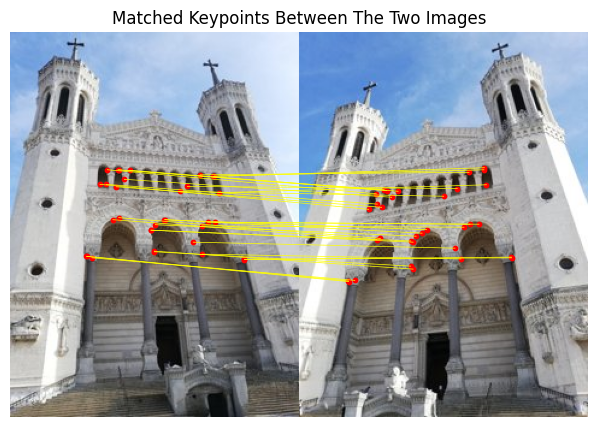

In [8]:
# plot matches i.e. couples of detected keypoints 
pipeline.plot_matches(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB), cv2.cvtColor(image2, cv2.COLOR_BGR2RGB), keypoints)

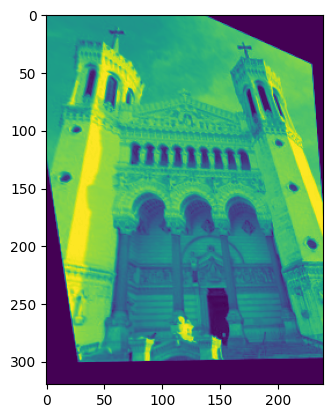

In [9]:
# image2 transformed to match image1 (grayscale representation)
imgplot_registered = plt.imshow(registered_image)

# SIFT method

In [10]:
# use another registration method

In [11]:
# use sift method
pipeline = RegistrationPipeline(RegistrationMethod.SIFT)
registered_image, keypoints = pipeline.run_pipeline(image1, image2)

In [12]:
# nb of keypoints found
keypoints.shape

(4, 29)

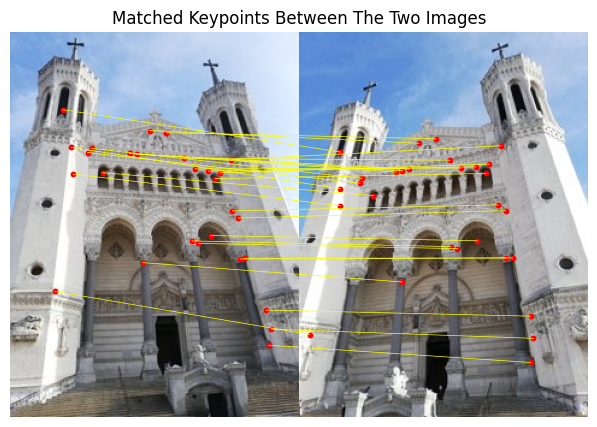

In [13]:
# plot matches i.e. couples of detected keypoints 
pipeline.plot_matches(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB), cv2.cvtColor(image2, cv2.COLOR_BGR2RGB), keypoints)

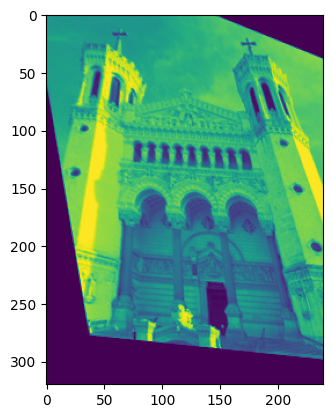

In [14]:
# image2 transformed to match image1 (grayscale representation)
imgplot_registered = plt.imshow(registered_image)